<a href="https://colab.research.google.com/github/nitron-alpha-kplr/Machine-Learning/blob/main/knn_iris_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification avec KNN et visualisation des classes avec Plotly


Ce notebook présente une classification de données en utilisant le modèle K plus proches voisins (KNN) avec scikit-learn. De plus, il propose une visualisation interactive des classes des fleurs en utilisant la bibliothèque Plotly.

## Étape 1 : Importation des bibliothèques nécessaires
Nous commençons par importer les bibliothèques nécessaires, notamment NumPy, Pandas, Plotly, scikit-learn, et les fonctions spécifiques pour le KNN. 

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Étape 2 : Chargement des données
Nous allons charger les données d'un jeu de données open source. Dans cet exemple, nous utilisons le jeu de données Iris disponible dans scikit-learn. Exécutez la cellule ci-dessous pour charger les données :

In [ ]:
data = load_iris()
X = data.data
y = data.target

## Étape 3 : Création d'un DataFrame
Pour faciliter la manipulation des données, nous allons créer un DataFrame à l'aide de Pandas. Les caractéristiques (features) sont stockées dans la variable X et les étiquettes (labels) dans la variable y. Exécutez la cellule ci-dessous pour créer le DataFrame :

In [ ]:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

## Étape 4 : Affichage des premières lignes du DataFrame
Examinons les premières lignes du DataFrame pour avoir un aperçu des données. Exécutez la cellule ci-dessous pour afficher les premières lignes :

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Étape 5 : Division des données en ensembles d'entraînement et de test
Nous allons diviser les données en ensembles d'entraînement et de test à l'aide de la fonction train_test_split de scikit-learn. Cela nous permettra d'évaluer les performances du modèle sur des données non vues lors de l'entraînement. Exécutez la cellule ci-dessous pour diviser les données :

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Étape 6 : Création et entraînement du modèle KNN
Maintenant, nous allons créer un modèle KNN en utilisant la classe KNeighborsClassifier de scikit-learn. Nous allons l'entraîner sur l'ensemble d'entraînement. Exécutez la cellule ci-dessous pour créer et entraîner le modèle :

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

## Étape 7 : Prédictions et évaluation du modèle
Nous allons utiliser le modèle entraîné pour faire des prédictions sur l'ensemble de test et évaluer les performances du modèle. Exécutez la cellule ci-dessous pour effectuer les prédictions et calculer l'exactitude (accuracy) du modèle :

In [ ]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude (Accuracy) : {:.2f}%".format(accuracy * 100))

Exactitude (Accuracy) : 100.00%


## Étape 8 : Visualisation des classes des fleurs avec Plotly
Enfin, nous allons utiliser la bibliothèque Plotly pour visualiser les classes des fleurs en 3D. Les attributs du DataFrame seront utilisés pour définir les coordonnées des axes et la couleur/symbole des points correspondant aux différentes classes de fleurs. Exécutez la cellule ci-dessous pour visualiser les classes des fleurs :

In [ ]:
df['target_names'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
fig = px.scatter_3d(df, x='sepal length (cm)', y='sepal width (cm)', z='petal width (cm)',
                    color='target_names', symbol='target_names')
fig.show()


### Étape 9 : Matrice de confusion et visualisation
Nous allons maintenant calculer la matrice de confusion pour évaluer les performances du modèle de classification KNN. La matrice de confusion est une table qui montre les classifications correctes et incorrectes faites par le modèle par rapport aux classifications réelles.

Exécutez la cellule ci-dessous pour calculer la matrice de confusion et visualiser les résultats :

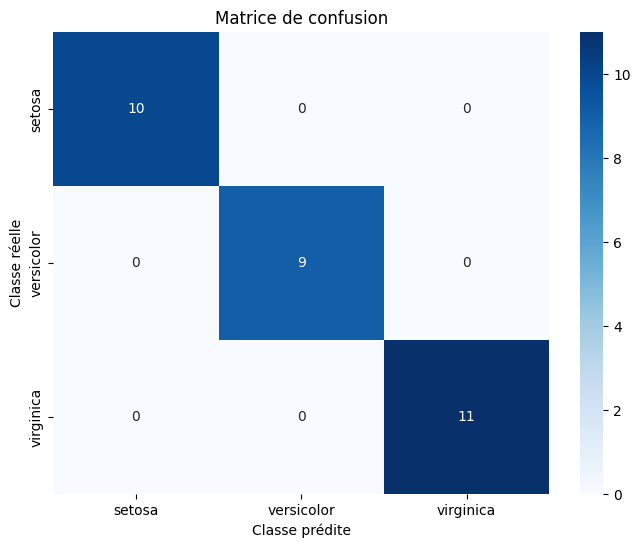

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.title("Matrice de confusion")
plt.show()